# Ergodicity and Density Dynamics simulations

The parameters are saved in the file `parameters.jl`. Let's start by importing the module ST1Ds.jl

In [1]:
include("../src/ST1Ds.jl")
using ST1Ds

Let's import the parameters file

In [2]:
include("parameters.jl")

ST1Ds.Integrator{ODE.#ode45_dp}("RK45",ODE.ode45_dp)

And codify them in the predefined type Parameters

In [3]:
parameters = Parameters(results, T, Q, dtsampling, dt, nsimulations, nsteps, thermo, potential, integrator)

ST1Ds.Parameters("trajectory",1.0,0.1,0.0125,0.0125,3,50000,ST1Ds.Thermostat{##1#2}("logistic",0.1,#1),ST1Ds.Potential{##3#4}("quartic",#3),ST1Ds.Integrator{ODE.#ode45_dp}("RK45",ODE.ode45_dp))

You may change the parameters from here. For instance, let's change the integrator from an adaptative RK45 to a Runge Kutta RK4 with fixed stepsize (the integrator, for the moment, must be supported in the package [ODE.jl](https://github.com/JuliaDiffEq/ODE.jl)

In [4]:
parameters.integrator

ST1Ds.Integrator{ODE.#ode45_dp}("RK45",ODE.ode45_dp)

In [5]:
parameters.integrator = Integrator("RK4", ode4)

ST1Ds.Integrator{ODE.#ode4}("RK4",ODE.ode4)

And let's compute the lyapunov exponents by changing the parameter `results`

In [6]:
parameters.results = "lyapunov"

"lyapunov"

We are ready to calculate the Lyapunov Spectrum for `nsimulations` initial conditions

In [7]:
parameters.nsimulations

3

In [8]:
runsimulation(parameters)

Simulation1 done
Simulation2 done
Simulation3 done
File lyapO6s8W.hdf5 succesfully generated. See file in ../data/


The Lyapunov Spectrum were generated in the created folder ../data/. Let's explore them

In [15]:
using HDF5
file = h5open("../data/lyapO6s8W.hdf5")
sim1 = read(file["simulation-2"])

Dict{String,Any} with 4 entries:
  "exp2"        => -0.00244868
  "exp3"        => -0.257903
  "initialcond" => [-0.70899,0.0940794,-0.131165]
  "exp1"        => 0.260198

Now, let's integrate an initial random condition for a total time equal to `nsteps*dt*nsimulations`

In [10]:
parameters.results = "trajectory"

"trajectory"

In [11]:
runsimulation(parameters)

Part 1 done. 
Part 2 done.
Part 3 done.
Trajectory trajskJgg.hdf5 succesfully generated. See file in ../data


The whole trajectory is saved in the file printed. Let's explore it

In [16]:
file = h5open("../data/trajskJgg.hdf5")
trajectory = read(file["tx"])

150001×4 Array{Float64,2}:
    0.0     -0.0180546    0.628297   -0.923667
    0.0125  -0.00968909   0.711937   -0.930561
    0.025   -0.000209886  0.806712   -0.935863
    0.0375   0.0105312    0.914105   -0.939121
    0.05     0.0227022    1.03579    -0.939755
    0.0625   0.0364935    1.17368    -0.937019
    0.075    0.0521207    1.32993    -0.929957
    0.0875   0.0698282    1.50697    -0.917339
    0.1      0.0898929    1.70756    -0.89759 
    0.1125   0.112628     1.93483    -0.868684
    0.125    0.138389     2.19231    -0.828024
    0.1375   0.167578     2.48396    -0.772275
    0.15     0.200649     2.81416    -0.697168
    ⋮                                         
 1874.86    -0.302378     0.0412912  -0.288408
 1874.88    -0.301829     0.0465735  -0.300884
 1874.89    -0.301211     0.052556   -0.313353
 1874.9     -0.300512     0.0593317  -0.325814
 1874.91    -0.299723     0.067006   -0.338264
 1874.92    -0.298833     0.0756983  -0.350701
 1874.94    -0.297826     0.08554

The data is saved in the format 
    $$t \quad q \quad p \quad ζ$$
You may plot it

In [14]:
using PyPlot

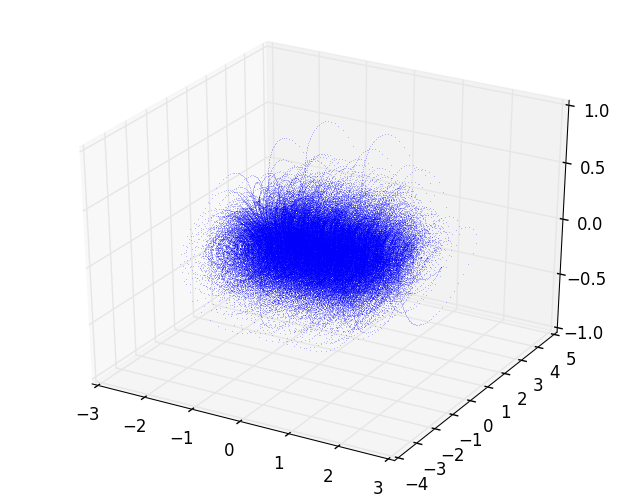

1-element Array{Any,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7f33b9beda10>

In [18]:
plot3D(trajectory[:,2], trajectory[:,3], trajectory[:,4], ".", ms = 0.5, alpha = 0.3)

## Poincaré sections

In [33]:
?sections

search: sections CompositeException InvalidStateException ProcessExitedException



This function computes the Poincare sections for the integrated trajectory saved in trajectorydata. It generates a .hdf5 file.

Example:

```
julia> sections("myfile", Potential("quartic", x -> x^4/4.), Thermostat("logistic", Q, z-> exp(z/Q)/(Q*( 1 +exp(z/Q))^2.)))
```


In [22]:
sections("trajskJgg", potential, thermo)

File sectionsskJgg.hdf5 succesfully generated. See file in ../data/


In [24]:
file = h5open("../data/sectionsskJgg.hdf5")
zsection = read(file["zsection"])
psection = read(file["psection"])

592×4 Array{Float64,2}:
    3.87387  -1.11776   -3.47612e-13   0.0339134 
   10.5548   -1.65754   -8.11799e-14  -0.0225321 
   17.1844   -1.09645   -2.68809e-13  -0.117912  
   22.7395   -1.08983   -2.30766e-13   0.104685  
   29.3697   -1.63819   -4.20037e-13  -0.0137154 
   36.0074   -1.08227   -7.13571e-14  -0.178729  
   41.6147   -0.982059  -8.25073e-13  -0.0827963 
   47.2387   -0.930922  -3.20719e-13  -0.302297  
   51.8796   -0.805612  -9.16527e-13   0.0746463 
   57.7742   -1.32713   -3.26656e-14  -0.0412238 
   64.1035   -1.36174   -8.10372e-13   0.121988  
   71.6445   -1.92188   -7.6925e-13   -0.0735999 
   79.6619   -1.86797   -6.01494e-13  -0.0182227 
    ⋮                                            
 1797.56      1.36171    8.20881e-13  -0.241116  
 1804.32      1.26071    7.44502e-13  -0.31124   
 1810.22      1.19582    7.70398e-13   0.191586  
 1816.44      1.21179    1.59825e-13   0.0128678 
 1822.6       1.19922    4.18072e-13  -0.11464   
 1830.17      1.68748    8

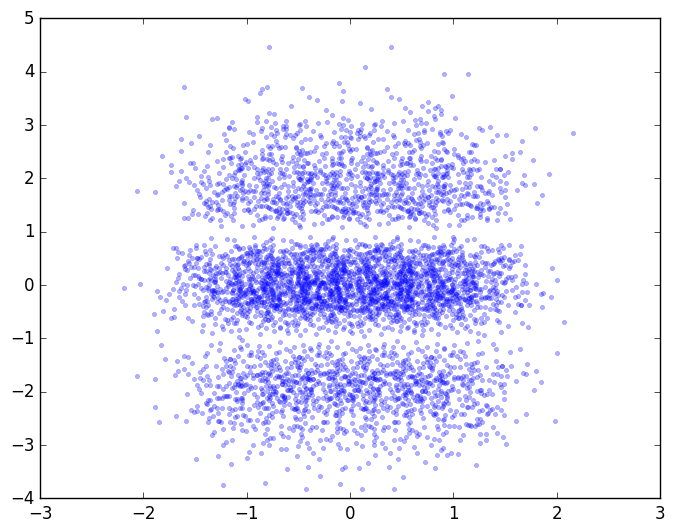

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f33b872d050>

In [29]:
plot(zsection[:,2], zsection[:,3], ".", alpha = 0.3)

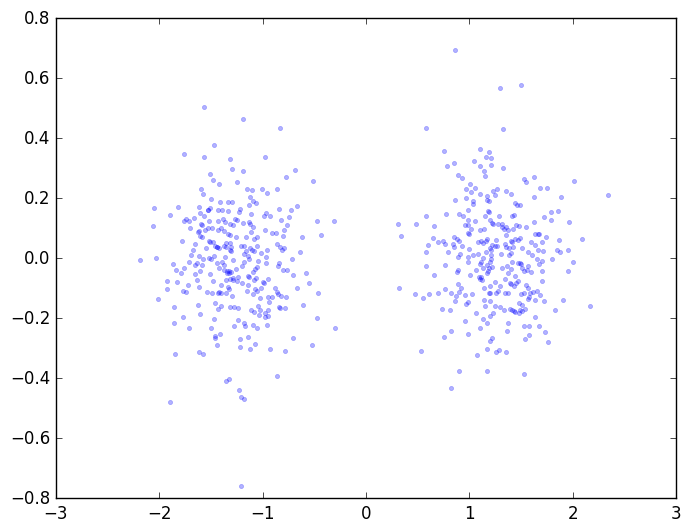

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f33b850e150>

In [31]:
plot(psection[:,2], psection[:,4], ".", alpha = 0.3)

## Marginal distributions

In [32]:
?marginaldistributions

search: marginaldistributions



This function generates an array saved as a plain text that contains the integrated trajectory together with each marginal theoretical distribution. The normalization factor associated with the distribution in `q` is passed as an argument.  Example:

```
julia> results = marginaldistributions(filename, Potential("quartic", x->x^4/4.), Thermostat("logistic", A, x -> exp(x/A)/(A*(1.+ exp(x/A)).^2)), normalizationfactor)
```


The normalization factor $Z$ corresponds to the configurational partition function, i.e.
    
$$ \rho(q) = \frac{e^{-\beta V(q)}}{Z} $$

$$ Z = \int_{-\infty}^{\infty} e^{-\beta V(q)} $$

For the quartic potential with $\beta = 1.0$, $Z = 2.563693352$

In [38]:
Z = 2.563693352
marginaldistributions("../data/trajskJgg", potential, thermo, Z)

File histskJgg succesfully generated. See file in ../data/


In [43]:
data_marg = readdlm("../data/histskJgg")

15001×6 Array{Float64,2}:
 -0.0180546  0.390062   0.628297    0.327484    -0.923667   0.000973828
  0.138389   0.390026   2.19231     0.0360784   -0.828024   0.00253349 
  0.575496   0.379511   3.05073     0.00380134   0.632346   0.0178731  
  0.791557   0.353598   0.846783    0.278745     0.93018    0.00091243 
  0.849025   0.342545   0.201503    0.390925     0.835834   0.00234324 
  0.860052   0.340196   0.0127864   0.39891      0.712168   0.00806105 
  0.857552   0.340735  -0.0416487   0.398596     0.587248   0.0280008  
  0.851198   0.342088  -0.056831    0.398299     0.462574   0.0960727  
  0.843764   0.343639  -0.0614449   0.39819      0.338016   0.318375   
  0.83583    0.345258  -0.0662046   0.398069     0.21352    0.945453   
  0.826778   0.347058  -0.0818922   0.397607     0.0891778  2.06212    
  0.813778   0.349557  -0.137326    0.395198    -0.0344388  2.42731    
  0.787151   0.354365  -0.325735    0.378329    -0.153405   1.4593     
  ⋮                                   

The data is saved in the format
$$q \quad \rho(q) \quad p \quad \rho(p) \quad \zeta \quad \rho(\zeta)  $$

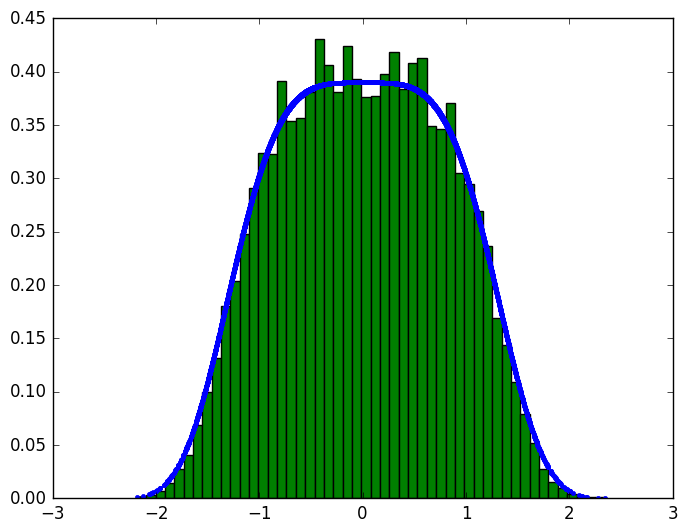

In [55]:
plot(data_marg[:,1], data_marg[:,2], ".", lw = 0.2)
plt[:hist](data_marg[:,1], 50, normed = true);

As long as the trajectory is increased, the correspondence between the histogram and the theoretical marginal distribution improves

## Hellinger distance

In [8]:
?hellingerdistance

search: hellingerdistance



This function returns a plain data text that contains the hellinger distance calculated in n (10 by default) different intervals of a trajectory together with its error. The normalization factor associated with the distribution in `q` is passed as an argument. Example:

```
julia> hellingerdistance(filename, Potential("quartic", x->x^4./4.),
Thermostat("logistic", Q, x -> exp(x/Q)/(Q*(1.+ exp(x/Q)).^2)), normalizationfactor, n)
```


In [11]:
hellingerdistance("../data/trajskJgg", potential, thermo, Z)

1
2
3
4
5
6
7
8
9
10
File hellingerskJgg succesfully generated. See file in ../data/


In [12]:
data_hell = readdlm("../data/hellingerskJgg")

10×3 Array{Float64,2}:
  186.25  0.0731164  0.000721984
  373.75  0.0688227  0.000683006
  561.25  0.0492575  0.000490612
  748.75  0.0424628  0.000421957
  936.25  0.0474648  0.000472687
 1123.75  0.0445186  0.000443429
 1311.25  0.046498   0.000462524
 1498.75  0.0458085  0.000457848
 1686.25  0.0437351  0.000434921
 1873.75  0.04399    0.000438224

The data is returned in the format $$time \quad hellinger \quad error $$

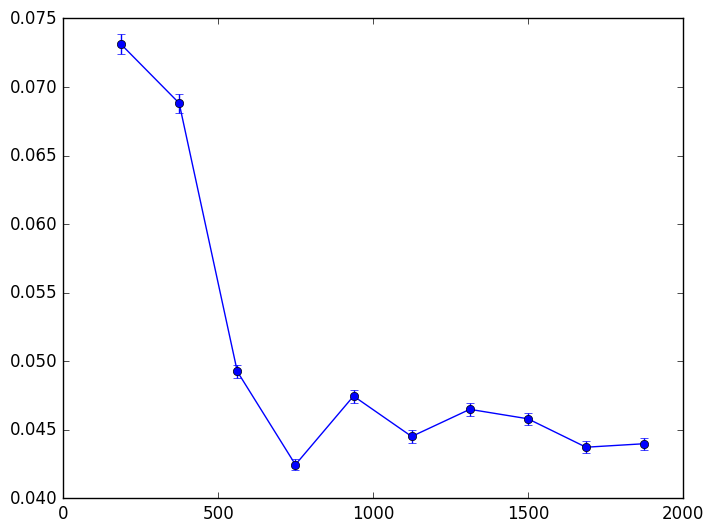

In [20]:
plt[:errorbar](data_hell[:,1], data_hell[:,2], yerr = data_hell[:,3], fmt = "o-");

As long as the trajectory is increased, the correspondence between the histogram and the theoretical marginal distribution improves